In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

header = ['i', 'success', 'method', 'preconditioning', 'dimension', 'point_number',
          'exact', 'h', 'absolute', 'fk', 'gradfk', 'k', 'time']
results_dir = '../results'

method_mapper = {
    0: 'Modified Newton',
    1: 'Truncated Newton',
}

In [27]:
def load_results(func):
    path = os.path.join(results_dir, func, 'results.csv')
    df = pd.read_csv(path, names=header)
    df.method = df.method.apply(lambda x: method_mapper[x])
    df.preconditioning = df.preconditioning.astype(bool)
    df.loc[df.fk.isna(), 'success'] = 0
    df.exact = df.exact.astype(bool)
    df.absolute = df.absolute.astype(bool)
    df.loc[:, 'fname'] = df.i.apply(lambda x: f"experiment_{x}.csv")
    df.set_index('i', inplace=True)
    for i, file in df.fname.items():
        path = os.path.join(results_dir, func, file)
        data = pd.read_csv(path)
        try:
            errors = data['error_norm'].iloc[-3:].values
            rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
        except:
            rate = np.nan
        df.loc[i, 'rate'] = rate
    return df

In [28]:
df = load_results('extended_rosenbrock')

In [61]:
rdf = pd.read_csv(os.path.join(results_dir, 'extended_rosenbrock', 'experiment_2.csv'))

In [62]:
e = rdf['error_norm'].iloc[-4:-1].values
print(np.log(e[2]/e[1]) / np.log(e[1]/e[0]))

-0.3157674278861308


In [23]:
def avg_table(df, method, exact, fname, absolute=None):
    table_df = df[
        (df.method == method) &
        (df.exact == exact)
    ].copy()
    # If finite differences, filter by h and add text
    if exact:
        differentiation_text = "with exact gradient and hessian"
        grouping = ['dimension', 'preconditioning']
    else:
        table_df = table_df[df.absolute == absolute]
        differentiation_text = f"with {'absolute' if absolute else 'relative'} finite differences"
        grouping = ['dimension', 'h', 'preconditioning']
        table_df.h = table_df.h.apply(lambda x: f"{x:.0e}")
    # Compute success rate and filter out unsuccessful attempts
    success_series = table_df.groupby(grouping).success.mean()
    table_df = table_df[table_df.success == 1]
    # Compute average metrics
    table_df = table_df.groupby(grouping)[['k', 'rate', 'time']].mean()
    table_df[['k', 'rate', 'time']] = table_df[['k', 'rate', 'time']].map(lambda x: f"{x:.2f}")
    # Add success rate to the table
    success_series = success_series.apply(lambda x: f"{x:.2f}")
    table_df = table_df.join(success_series).rename(
        {'success': 'success rate', 'rate': 'convergence rate', 'k': 'iterations'}, axis=1).unstack()
    text = table_df.to_latex(
        multicolumn_format='|c',
        column_format = 'r' + '|cc'*(table_df.shape[1] // 2) if exact else 'rr' + '|cc'*(table_df.shape[1] // 2),
        caption=f"Results for {method} method applied to {fname} {differentiation_text}, metrics are average metrics for succesful attempts.",
        label=f"tab:{method}_{fname}_{'exact' if exact else 'fd'}{'' if absolute is None else'_abs' if absolute else '_rel'}".replace(' ', '_'))
    text = text[:13] + "\n\\centering" + text[13:]
    return table_df, text

In [24]:
functions = ['extended_rosenbrock', 'generalized_broyden', 'banded_trigonometric']
fnames = ['Extended Rosenbrock', 'Generalized Broyden', 'Banded Trigonometric']
methods = ['Modified Newton', 'Truncated Newton']
exacts = [True, False]
hs = [10**x for x in range(-2, -14, -2)]
relatives = [True, False]
i = 0

for func, fname in zip(functions, fnames):
    try:
        df = load_results(func)
    except:
        print(f"Missing function {fname}")
        continue
    for method in methods:
        table_df, text = avg_table(df, method, True, fname)
        print(text)
    for method in methods:
        for absolute in [True, False]:
            table_df, text = avg_table(df, method, False, fname, absolute)
            print(text)

\begin{table}
\centering
\caption{Results for Modified Newton method applied to Extended Rosenbrock with exact gradient and hessian, metrics are average metrics for succesful attempts.}
\label{tab:Modified_Newton_Extended_Rosenbrock_exact}
\begin{tabular}{r|cc|cc|cc|cc}
\toprule
 & \multicolumn{2}{|c}{iterations} & \multicolumn{2}{|c}{convergence rate} & \multicolumn{2}{|c}{time} & \multicolumn{2}{|c}{success rate} \\
preconditioning & False & True & False & True & False & True & False & True \\
dimension &  &  &  &  &  &  &  &  \\
\midrule
3 & 32.00 & 30.18 & 2.00 & 2.23 & 0.04 & 0.02 & 1.00 & 1.00 \\
4 & 32.55 & 30.27 & 1.95 & 1.98 & 0.11 & 0.08 & 1.00 & 1.00 \\
5 & 33.45 & 31.73 & 1.90 & 2.10 & 1.10 & 0.69 & 1.00 & 1.00 \\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\centering
\caption{Results for Truncated Newton method applied to Extended Rosenbrock with exact gradient and hessian, metrics are average metrics for succesful attempts.}
\label{tab:Truncated_Newton_Extended_R

/tmp/ipykernel_47810/2626718763.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table_df = table_df[df.absolute == absolute]
/tmp/ipykernel_47810/2626718763.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table_df = table_df[df.absolute == absolute]
/tmp/ipykernel_47810/2626718763.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table_df = table_df[df.absolute == absolute]
/tmp/ipykernel_47810/2626718763.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table_df = table_df[df.absolute == absolute]
/tmp/ipykernel_47810/2421082506.py:16: RuntimeWarning: invalid value encountered in scalar divide
  rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
/tmp/ipykernel_47810/2421082506.py:16: RuntimeWarning: invalid value encountered in scalar divide
  rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
/tmp/ipykernel_47810/2

\begin{table}
\centering
\caption{Results for Modified Newton method applied to Generalized Broyden with exact gradient and hessian, metrics are average metrics for succesful attempts.}
\label{tab:Modified_Newton_Generalized_Broyden_exact}
\begin{tabular}{r|cc|cc|cc|cc}
\toprule
 & \multicolumn{2}{|c}{iterations} & \multicolumn{2}{|c}{convergence rate} & \multicolumn{2}{|c}{time} & \multicolumn{2}{|c}{success rate} \\
preconditioning & False & True & False & True & False & True & False & True \\
dimension &  &  &  &  &  &  &  &  \\
\midrule
3 & 8.64 & 8.64 & 1.97 & 1.98 & 0.01 & 0.00 & 1.00 & 1.00 \\
4 & 7.67 & 8.00 & 1.90 & 1.93 & 0.03 & 0.03 & 1.00 & 1.00 \\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\centering
\caption{Results for Truncated Newton method applied to Generalized Broyden with exact gradient and hessian, metrics are average metrics for succesful attempts.}
\label{tab:Truncated_Newton_Generalized_Broyden_exact}
\begin{tabular}{r|cc|cc|cc|cc}
\toprule
 & \multic

/tmp/ipykernel_47810/2421082506.py:16: RuntimeWarning: invalid value encountered in scalar divide
  rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
/tmp/ipykernel_47810/2421082506.py:16: RuntimeWarning: invalid value encountered in scalar divide
  rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
/tmp/ipykernel_47810/2421082506.py:16: RuntimeWarning: invalid value encountered in scalar divide
  rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
/tmp/ipykernel_47810/2421082506.py:16: RuntimeWarning: invalid value encountered in scalar divide
  rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
/tmp/ipykernel_47810/2421082506.py:16: RuntimeWarning: invalid value encountered in scalar divide
  rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
/tmp/ipykernel_47810/2421082506.py:16: RuntimeWarning: invalid value encountered in scalar divide
  rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
/tmp/ipyke

In [16]:
df[(df.method=="Modified Newton") & (df.exact==False) & (df.absolute==False)]

,success,method,preconditioning,dimension,point_number,exact,h,absolute,fk,gradfk,k,time,fname,rate
i,,,,,,,,,,,,,,
9,0,Modified Newton,False,3,0,False,1.000000e-02,False,3.096247e-06,4.311547e-04,1000,0.619460,experiment_9.csv,NaN
10,0,Modified Newton,False,3,0,False,1.000000e-02,False,2.929321e-06,3.162874e-03,1000,0.373009,experiment_10.csv,NaN
11,0,Modified Newton,True,3,0,False,1.000000e-02,False,3.096247e-06,4.311547e-04,1000,0.627743,experiment_11.csv,NaN
12,0,Modified Newton,True,3,0,False,1.000000e-02,False,3.096247e-06,4.311547e-04,1000,0.352520,experiment_12.csv,NaN
17,1,Modified Newton,False,3,0,False,1.000000e-04,False,3.459710e-14,5.757089e-10,6,0.003159,experiment_17.csv,1.726018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656,1,Modified Newton,True,5,9,False,1.000000e-10,False,2.164707e-19,2.521980e-09,12,0.180059,experiment_1656.csv,2.005007
1661,1,Modified Newton,False,5,9,False,1.000000e-12,False,3.167906e-18,1.032384e-08,8,0.357058,experiment_1661.csv,1.748835
1662,1,Modified Newton,False,5,9,False,1.000000e-12,False,6.663563e-16,1.790840e-07,14,0.163999,experiment_1662.csv,1.992187


In [148]:
# Run the following code only if latex is available on the system
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.serif': 'Times',
    'font.size': 12,
    'text.usetex': True,
    'pgf.rcfonts': False,
})

figures_folder = "../report/figures"

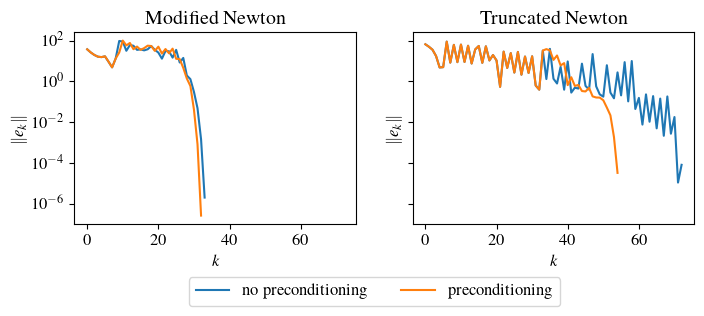

In [150]:
df = load_results('extended_rosenbrock')
idx = df[(df.dimension==5) & (df.exact == True) & (df.point_number == 1)].index.values
fig, axs = plt.subplots(1, 2, figsize=(8,2.5), sharex=True, sharey=True)
for i in idx:
    expdf = pd.read_csv(os.path.join(results_dir, 'extended_rosenbrock', f"experiment_{i}.csv"))
    k = 0 if df.loc[i, 'method'] == 'Modified Newton' else 1
    axs[k].plot(expdf['error_norm'], label="preconditioning" if df.loc[i, 'preconditioning'] else "no preconditioning")
for ax in axs:
    ax.set_yscale('log')
    ax.set_ylabel('$\Vert e_k \Vert$')
    ax.set_xlabel('$k$')
by_label = {label: line for line, label in zip(*axs[0].get_legend_handles_labels())}
fig.legend(by_label.values(), by_label.keys(), loc='lower center', ncol=2, bbox_to_anchor=(0.5, -.25))
axs[0].set_title('Modified Newton')
axs[1].set_title('Truncated Newton')
fig.savefig(os.path.join(figures_folder, 'extended_rosenbrock_error.pdf'), bbox_inches='tight')